Для произвольно выбранного датасета провести обработку данных и построить предсказательную модель с использованием функционала pySpark.

(если есть проблемы с выбором - использовать winequality-red.csv).

In [3]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.sql.functions import desc
from pyspark.sql.functions import *
from pyspark.sql.functions import max as sparkMax

import pyspark.sql.functions as F

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix

import warnings; warnings.filterwarnings(action='once')

In [4]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = 'python'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'

In [5]:
SparkSession \
  .builder \
  .master("local[*]")\
  .appName("Pyspark") \
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", "8g") \
  .config("spark.driver.memory", "8g")\
  .config("spark.sql.shuffle.partitions" , "800") \
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","8g")\
  .getOrCreate()

23/07/15 15:33:51 WARN Utils: Your hostname, sergeys-X570-AORUS-MASTER resolves to a loopback address: 127.0.1.1; using 10.0.0.15 instead (on interface wlp5s0)
23/07/15 15:33:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/15 15:33:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/07/15 15:33:52 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/07/15 15:33:52 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [9]:
"/home/sergeys/Study/DS04/DS04_2/HW/HW_pyspark/winequality-red.csv"

'/home/sergeys/Study/DS04/DS04_2/HW/HW_pyspark/winequality-red.csv'

In [10]:
pwd

'/home/sergeys/Study/DS04/DS04_2/HW/HW_pyspark'

In [8]:
#Creating a Spark session
mySpark = SparkSession.builder.getOrCreate()
spark = SparkSession(mySpark)

In [15]:
data = spark.read.csv("/home/sergeys/Study/DS04/DS04_2/HW/HW_pyspark/winequality-red.csv",inferSchema="true", header="true", sep=";")

In [16]:
#Display of column name and data type
data.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



In [17]:
data.count()

1599

In [18]:
data.show(10)

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|          7.4|             0.7|        0.0|           1.9|    0.076|               11.0|                34.0| 0.9978|3.51|     0.56|    9.4|      5|
|          7.8|            0.88|        0.0|           2.6|    0.098|               25.0|                67.0| 0.9968| 3.2|     0.68|    9.8|      5|
|          7.8|            0.76|       0.04|           2.3|    0.092|               15.0|                54.0|  0.997|3.26|     0.65|    9.8|      5|
|         11.2|            0.28|       0.56|           1.9|    0.075|               17.0|           

In [20]:
data.pandas_api().isna().mean()

/home/sergeys/anaconda3/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [71]:
data.groupBy("quality").count().show()  

+-------+-----+
|quality|count|
+-------+-----+
|      7|  199|
|      8|   18|
|      3|   10|
|      5|  681|
|      6|  638|
|      4|   53|
+-------+-----+



/home/sergeys/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/sergeys/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/sergeys/anaconda3/lib/python3.9/site-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
/home/sergeys/anaconda3/lib/python3.9/socket.py:775: ResourceWarning: unclosed <socket.socket fd=81, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 43646), raddr=('127.0.0.1', 41939)>
  self._sock = None


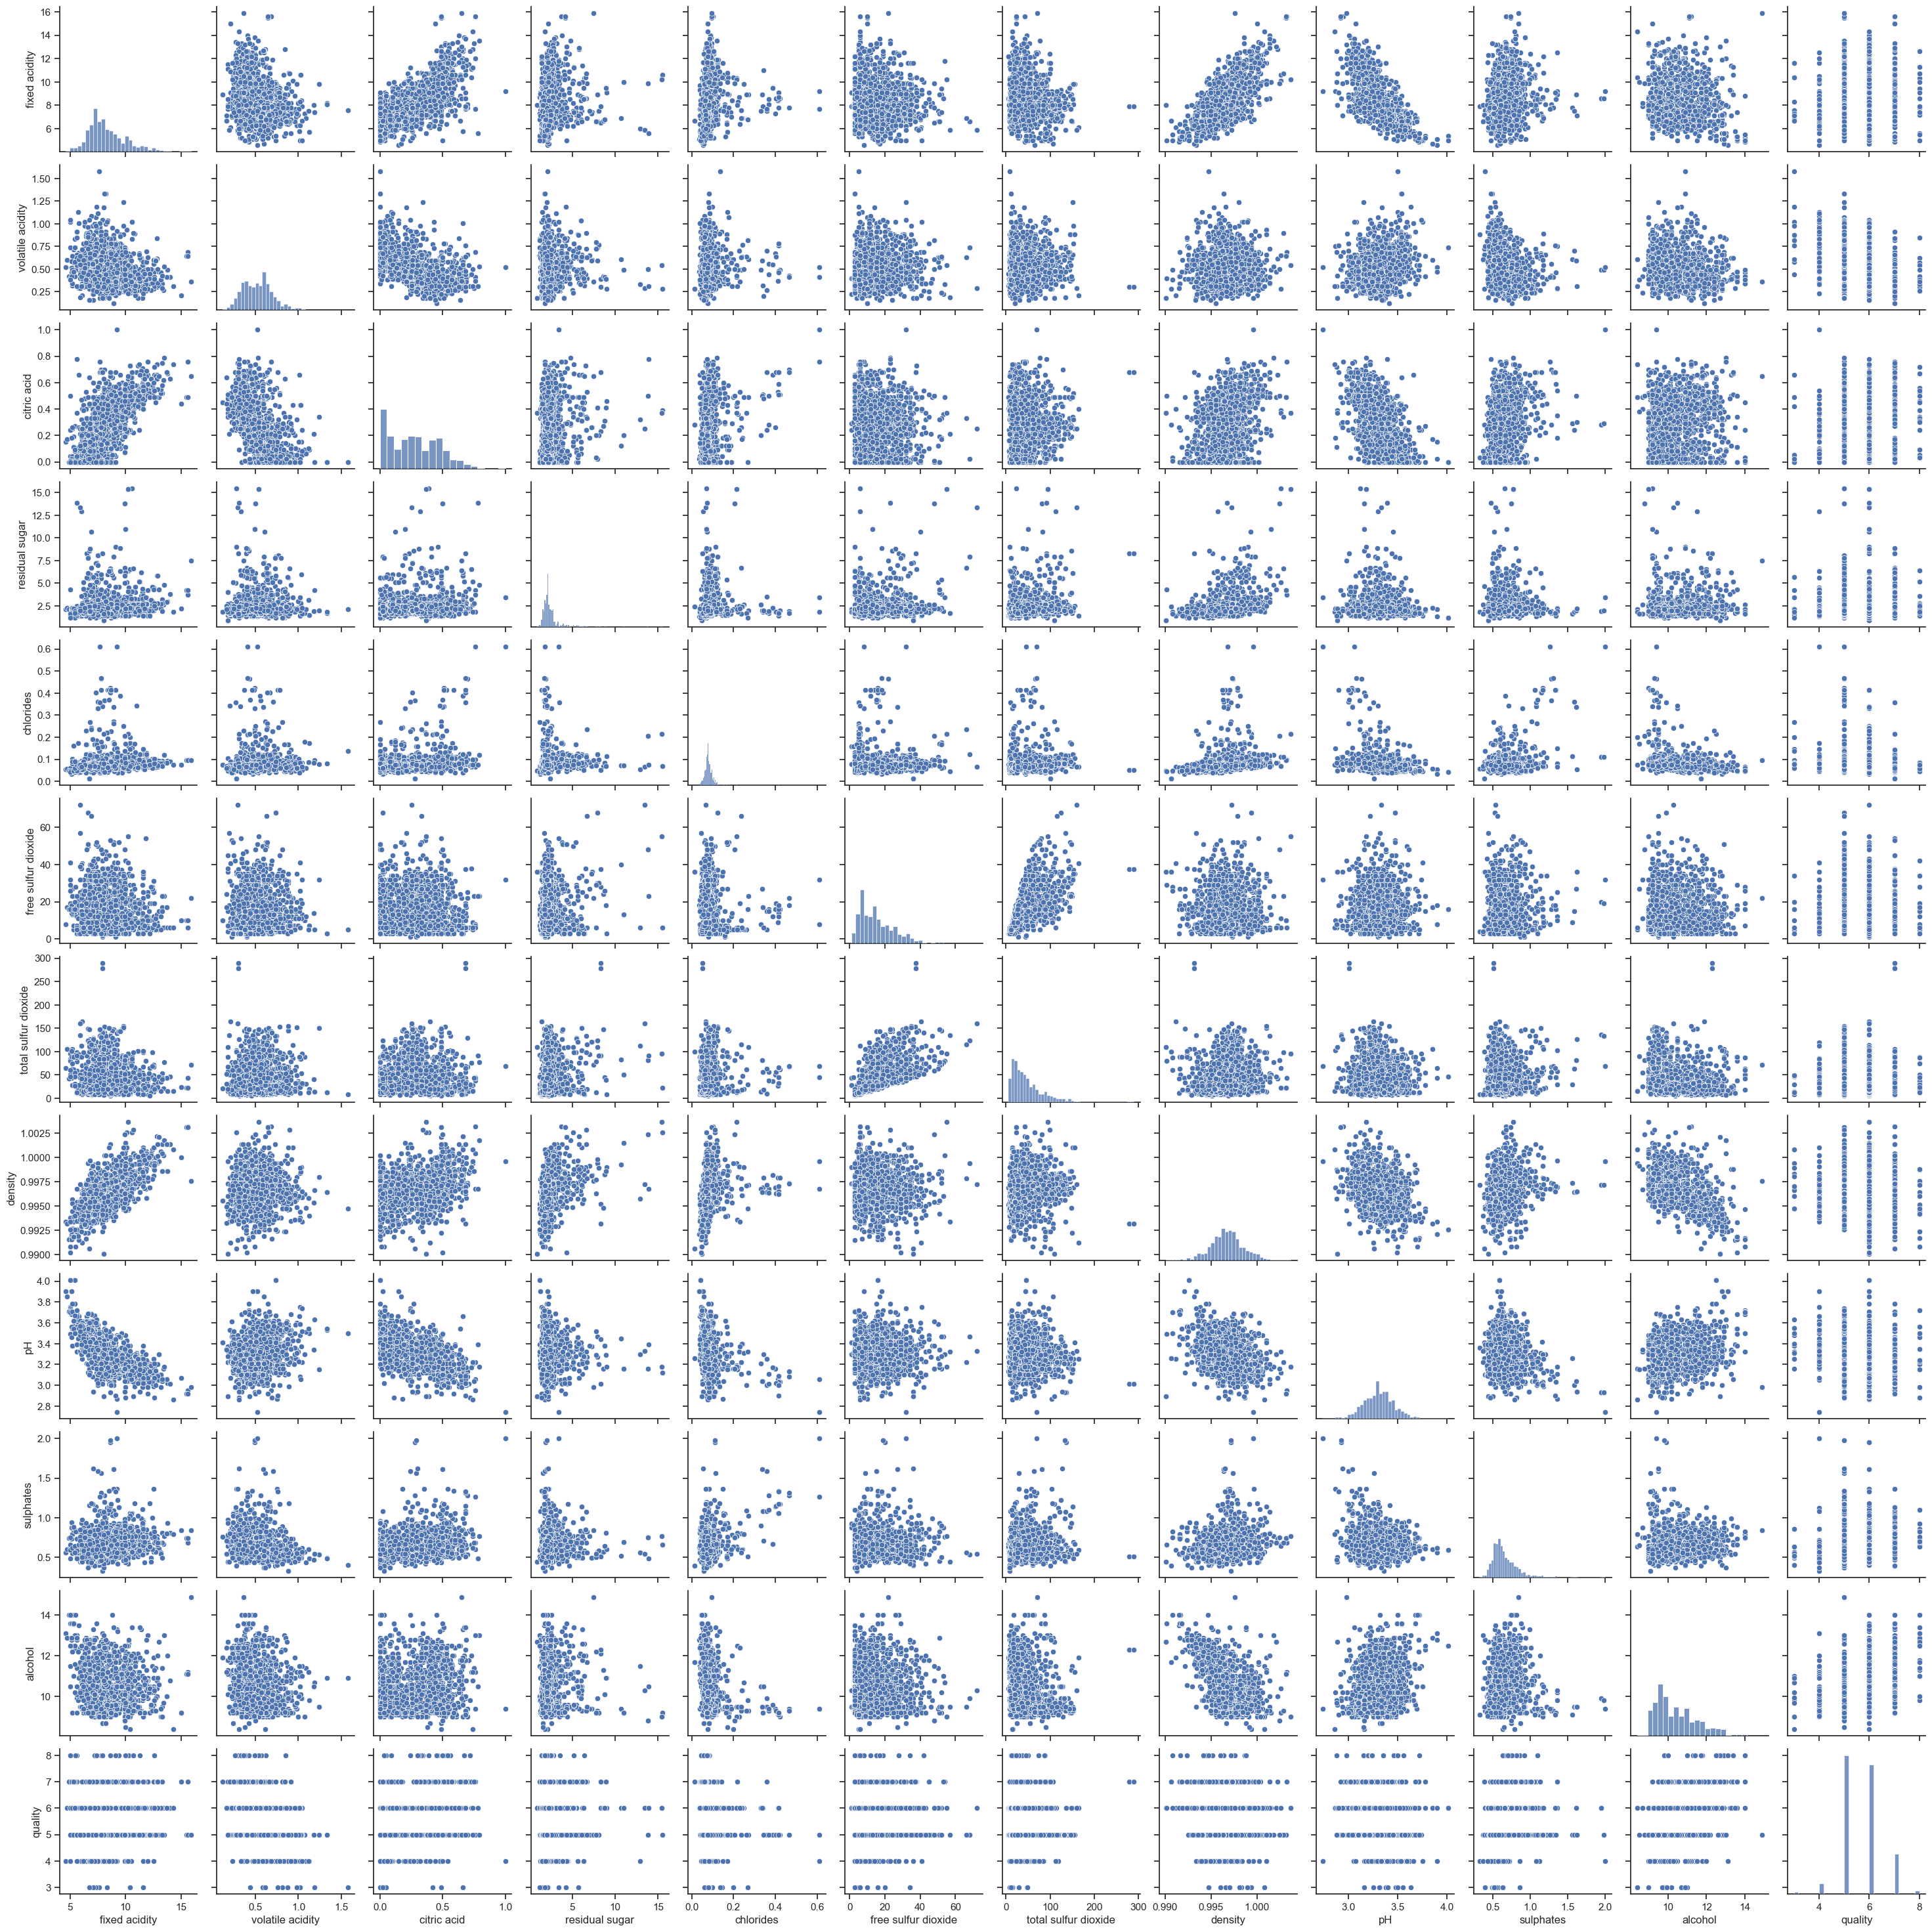

In [23]:
sns.set(style="ticks")

sns.pairplot(data.toPandas())
plt.show()

In [29]:
data.toPandas()

/home/sergeys/anaconda3/lib/python3.9/site-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
/home/sergeys/anaconda3/lib/python3.9/socket.py:775: ResourceWarning: unclosed <socket.socket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 36020), raddr=('127.0.0.1', 40359)>
  self._sock = None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
from pyspark.ml.feature import  StringIndexer, VectorAssembler
 
stages = []

label_stringIdx = StringIndexer(inputCol = 'quality', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

assembler = VectorAssembler(inputCols=numericCols, outputCol="Subscribed")
stages += [assembler]

In [30]:
cols = data.columns

In [31]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [38]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(data)
data = pipelineModel.transform(data)
selectedCols = ['label', 'Subscribed'] + cols
data = data.select(selectedCols)
data.printSchema()

root
 |-- label: double (nullable = false)
 |-- Subscribed: vector (nullable = true)
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



In [40]:
data_p = pd.DataFrame(data.take(5), columns=data.columns)

/home/sergeys/anaconda3/lib/python3.9/socket.py:775: ResourceWarning: unclosed <socket.socket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 40708), raddr=('127.0.0.1', 33981)>
  self._sock = None


In [62]:
sv = data_p['Subscribed'][1]

In [64]:
train, test = data.randomSplit([0.8, 0.2], seed = 2022)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1293
Test Dataset Count: 306


***Logistic Regression***

In [65]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'Subscribed', labelCol = 'label', maxIter=15)
lrModel = lr.fit(train)

In [61]:
lrModel.coefficientMatrix

DenseMatrix(6, 11, [-0.3929, 0.4058, 0.4926, -0.163, 4.3776, -0.0112, 0.0173, 264.6112, ..., -0.1457, 15.2838, 0.008, -0.0081, 265.6455, 2.3582, -2.3172, -0.5972], 1)

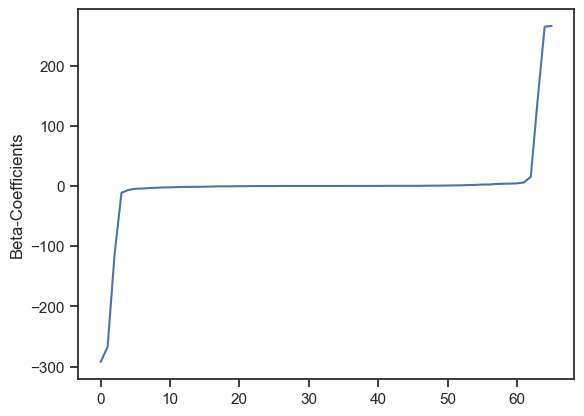

In [69]:
beta = np.sort(lrModel.coefficientMatrix.values)
plt.plot(beta)
plt.ylabel('Beta-Coefficients')
plt.show()

In [72]:
trainingSummary = lrModel.summary
accuracy = trainingSummary.accuracy
precision = trainingSummary.precisionByLabel
recall = trainingSummary.recallByLabel

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6094354215003867
Precision: [0.6724409448818898, 0.5571428571428572, 0.5, 0.42857142857142855, 0.0, 1.0]
Recall: [0.7707581227436823, 0.6141732283464567, 0.2795031055900621, 0.06521739130434782, 0.0, 0.1111111111111111]


In [66]:
predictions = lrModel.transform(test)
predictions.filter((F.col('prediction') == 1))\
    .show(20, True)

+-----+--------------------+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+--------------------+----------+
|label|          Subscribed|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|       rawPrediction|         probability|prediction|
+-----+--------------------+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+--------------------+----------+
|  0.0|[5.6,0.54,0.04,1....|          5.6|            0.54|       0.04|           1.7|    0.049|                5.0|                13.0| 0.9942|3.72|     0.58|   11.4|      5|[1.20317972551615...|[0.14634589469312...|       1.0|
|  0.0|[5.6,0.66,0.0,2.5...|          5.6|            0.66|        0.0|         

RandomForestClassifier

In [82]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'Subscribed', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.filter((F.col('prediction') == 1.0))\
    .show()

+-----+--------------------+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+--------------------+----------+
|label|          Subscribed|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|       rawPrediction|         probability|prediction|
+-----+--------------------+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+--------------------+--------------------+----------+
|  0.0|[5.3,0.715,0.19,1...|          5.3|           0.715|       0.19|           1.5|    0.161|                7.0|                62.0|0.99395|3.62|     0.61|   11.0|      5|[4.73775179693139...|[0.23688758984656...|       1.0|
|  0.0|[5.6,0.54,0.04,1....|          5.6|            0.54|       0.04|         

In [88]:
from pyspark.ml.evaluation import  MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.561115325132847
